## [ ÏÇ∞Î∂à Í∞êÏßÄ Ïù¥ÏßÑ Î∂ÑÎ•ò CNN Î™®Îç∏ ]
#### - CNN NoFire / Not_NoFire Î∂ÑÎ•ò Î™®Îç∏

[1] Î™®Îìà Î°úÎî© Î∞è Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ<hr>

In [42]:
## Î™®Îìà Î°úÎî©
import torch                                        ## Tensor Î∞è Í∏∞Î≥∏ Ìï®ÏàòÎì§ Í¥ÄÎ†® Î™®Îìà
import torch.nn as nn                               ## Ïù∏Í≥µÏã†Í≤ΩÎßù Í¥ÄÎ†® Î™®Îìà
import torch.nn.functional as F # type: ignore
import torch.optim as optim 
from   torch.optim.lr_scheduler import ReduceLROnPlateau
from   torchmetrics.classification import *

from torchvision.datasets import ImageFolder       ## ÎπÑÏ†ºÍ¥ÄÎ†® ÎÇ¥Ïû• Îç∞Ïù¥ÌÑ∞ÏÖã Î™®Îìà
from torch.utils.data import DataLoader             ## PytorchÏùò Îç∞Ïù¥ÌÑ∞ÏÖã Í¥ÄÎ†® Î™®Îìà
from torchinfo import summary                       ## Î™®Îç∏ Íµ¨Ï°∞ Î∞è Ï†ïÎ≥¥ ÌôïÏù∏ Î™®Îìà

import torchvision.transforms as transforms         ## ÎπÑÏ†ºÍ¥ÄÎ†® Ïù¥ÎØ∏ÏßÄ Ï¶ùÍ∞ï/Î≥ÄÌôò Í¥ÄÎ†® Î™®Îìà

import matplotlib.pyplot as plt                     ## Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî 

import torchvision.models as models

In [43]:
IMG_ROOT_tr = '../MINIPROJECT10/data/image/DATASET/train/'       ## Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• Ìè¥Îçî Í≤ΩÎ°ú
IMG_ROOT_ts = '../MINIPROJECT10/data/image/DATASET/test/'
IMG_ROOT_va = '../MINIPROJECT10/data/image/DATASET/val/'

[2] Îç∞Ïù¥ÌÑ∞ Î°úÎî© <hr>

In [44]:
## Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò ÏÑ§Ï†ï
preprocessing = transforms.Compose(
    [
        transforms.Resize((50,50)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

## Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
trainDS = ImageFolder(IMG_ROOT_tr,transform=preprocessing)
testDS  = ImageFolder(IMG_ROOT_ts,transform=preprocessing)
validDS = ImageFolder(IMG_ROOT_va,transform=preprocessing)

# ## Îç∞Ïù¥ÌÑ∞ÏÖã ÏÑûÍ∏∞
# trainDL = DataLoader(trainDS, batch_size=32, shuffle=True)
# testDL  = DataLoader(testDS, batch_size=32, shuffle=False)
# validDL = DataLoader(validDS, batch_size=32, shuffle=False) 

In [45]:
## Îç∞Ïù¥ÌÑ∞ÏÖã Ï≤¥ÌÅ¨
## - ÌÉÄÏûÖ
print(f'type         : {type(trainDS)}')

## - ÏÜçÏÑ± : ÌÅ¥ÎûòÏä§ Ï†ïÎ≥¥
print(f'classes      : {trainDS.classes}')
print(f'class_to_idx : {trainDS.class_to_idx}')

type         : <class 'torchvision.datasets.folder.ImageFolder'>
classes      : ['nofire', 'not_nofire']
class_to_idx : {'nofire': 0, 'not_nofire': 1}


In [46]:
## Îç∞Ïù¥ÌÑ∞ÏÖã Ï≤¥ÌÅ¨
## - ÌÉÄÏûÖ
print(f'type         : {type(testDS)}')

## - ÏÜçÏÑ± : ÌÅ¥ÎûòÏä§ Ï†ïÎ≥¥
print(f'classes      : {testDS.classes}')
print(f'class_to_idx : {testDS.class_to_idx}')

type         : <class 'torchvision.datasets.folder.ImageFolder'>
classes      : ['nofire', 'not_nofile']
class_to_idx : {'nofire': 0, 'not_nofile': 1}


In [47]:
## Îç∞Ïù¥ÌÑ∞ÏÖã Ï≤¥ÌÅ¨
## - ÌÉÄÏûÖ
print(f'type         : {type(validDS)}')

## - ÏÜçÏÑ± : ÌÅ¥ÎûòÏä§ Ï†ïÎ≥¥
print(f'classes      : {validDS.classes}')
print(f'class_to_idx : {validDS.class_to_idx}')

type         : <class 'torchvision.datasets.folder.ImageFolder'>
classes      : ['nofire', 'not_nofire']
class_to_idx : {'nofire': 0, 'not_nofire': 1}


In [48]:
# ## - ÏÜçÏÑ± : Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÉÄÍ≤ü
# print(f'targets      : {testDS.targets} {len(trainDS.classes)}')
# print(f'data         : {testDS.samples.shape}')

In [49]:
testDS[0]

(tensor([[[ 0.5451,  0.5451,  0.5451,  ...,  0.4196,  0.4196,  0.4118],
          [ 0.5765,  0.5765,  0.5765,  ...,  0.4196,  0.4118,  0.4039],
          [ 0.5529,  0.5529,  0.5608,  ...,  0.4196,  0.4118,  0.4118],
          ...,
          [-0.6549, -0.7569, -0.8039,  ..., -0.6314, -0.6078, -0.6549],
          [-0.7176, -0.8275, -0.8353,  ..., -0.7490, -0.6784, -0.7961],
          [-0.7961, -0.8275, -0.8353,  ..., -0.8039, -0.7412, -0.8196]],
 
         [[-0.0039, -0.0039, -0.0039,  ..., -0.0980, -0.0980, -0.1059],
          [ 0.0275,  0.0275,  0.0275,  ..., -0.0980, -0.1059, -0.1137],
          [ 0.0039,  0.0039,  0.0118,  ..., -0.0980, -0.1059, -0.1059],
          ...,
          [-0.6314, -0.7412, -0.7882,  ..., -0.6392, -0.6000, -0.6392],
          [-0.6941, -0.8118, -0.8196,  ..., -0.7412, -0.6627, -0.7804],
          [-0.7804, -0.8118, -0.8196,  ..., -0.7961, -0.7333, -0.8118]],
 
         [[-0.6941, -0.6941, -0.6941,  ..., -0.6784, -0.6784, -0.6863],
          [-0.6627, -0.6627,

In [50]:
## CNN MODEL -----------------------------------------------------------------------
## ÌÅ¥ÎûòÏä§Ïù¥Î¶Ñ : FashionDNN
## Î∂ÄÎ™®ÌÅ¥ÎûòÏä§ : nn.Module
## Î™®Îç∏Íµ¨ÌòÑÎ≤ï : ÏßÄÎèÑÌïôÏäµ + Îã§Ï§ë Î∂ÑÎ•ò 
## Î™®Îç∏Ï∏µ Íµ¨ÏÑ±  ÏûÖÎ†•ÌîºÏ≥ê/Ïã†Ìò∏     Ï∂úÎ†•/ÌçºÏÖâÌä∏Î°†Ïàò    ÌôúÏÑ±ÌôîÌï®Ïàò
## ÏûÖ  Î†•  Ï∏µ       784             512             ReLu
## ÏùÄ  Îãâ  Ï∏µ       512             256             ReLu
## ÏùÄ  Îãâ  Ï∏µ       256             130             ReLu
## Ï∂ú  Î†•  Ï∏µ       130             10               X
## ----------------------------------84----------------------------------------------
class NoFireForestCNN(nn.Module):
    def __init__(self, isDebug=False):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(4608, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )
        
    ## ÏàúÎ∞©Ìñ• ÌïôÏäµ ÏßÑÌñâ Î©îÏÑúÎìú 
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)   # Flatten
        x = self.fc_layers(x)
        return x

[4] ÌïôÏäµ Ï§ÄÎπÑ <hr>

In [62]:
## ÌïôÏäµ ÏÑ§Ï†ï
EPOCHS      = 100                                                                                   ### Î™á Î≤à ÌïôÏäµ
BATCH_SIZE  = 128                                                                                   ### Î™á Í∞úÏî© ÌïôÏäµ  ### ÎÑàÎ¨¥ ÏûëÏïÑÎèÑ Ïïà ÎêòÍ≥† ÎßéÏïÑÎèÑ Ïïà Îê®
T_ITERATION = int(len(trainDS)/BATCH_SIZE)
V_ITERATION = int(len(validDS)/BATCH_SIZE)                                                  ### Î∞∏Î¶¨Îç∞Ïù¥ÏÖò Îç∞Ïù¥ÌÑ∞ ÏûàÏúºÎ©¥ testDS ÎåÄÏã† ÎÑ£Í∏∞

## ÏµúÏ†ÅÌôî ÏÑ§Ï†ï
LR          = 0.0005                       ## W,b ÏóÖÎç∞Ïù¥ÌÑ∞ Í∞ÑÍ≤© Ï°∞Ï†à
PAT_CNT     = 3                          ## Î™®Îç∏ ÏÑ±Îä• ÎØ∏Í∞úÏÑ† Ï∞∏ÏùÑ Ïàò ÏûàÎäî Ïàò ÌöüÏàò                  ### Îü¨ÎãùÎ†àÏù¥Ìä∏ Ï°∞Ï†à Î∂ÄÎ∂Ñ
CLASSES     = len(trainDS.classes)

## ÌïôÏäµ Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎî© Ïã§Ìñâ ÏúÑÏπò/Ï†ÄÏû• ÏúÑÏπò
DEVICE      = 'gpu' if torch.cuda.is_available() else 'cpu'

print(f'DEVICE => {DEVICE}')                                                                        ### Í∏∞Í∏∞ Ï≤¥ÌÅ¨

DEVICE => cpu


In [63]:
## Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
GEN         = torch.Generator().manual_seed(42)     ## ÎûúÎç§ ÏãúÎìú Í≥†Ï†ï
TRAINDL     = DataLoader(trainDS, batch_size=BATCH_SIZE, shuffle=True, generator=GEN)           ### ÌïÑÏöîÌïú ÎßåÌÅºÎßå Í∫ºÎÇ¥Ï£ºÎäî ÏπúÍµ¨ 
TESTDL      = DataLoader(testDS,  batch_size=BATCH_SIZE, shuffle=False, generator=GEN)
VALIDDL     = DataLoader(validDS, batch_size=BATCH_SIZE, shuffle=False, generator=GEN)
## Î™®Îç∏Í≥º ÏµúÏ†ÅÌôî Í¥ÄÎ†®
MODEL       = NoFireForestCNN()      ### True : ÎîîÎ≤ÑÍπÖÏö© 
OPTIMIZER   = optim.Adam(MODEL.parameters(), lr=LR)                                  ### lr : Í∞ÑÍ≤© ÎÑàÎ¨¥ Ïª§ÎèÑ Ïïà ÎêòÍ≥† ÏûëÏïÑÎèÑ Ïïà Îê® Ï°∞Ï†àÌï¥Ïïº Ìï®
SCHEDULER   = ReduceLROnPlateau(OPTIMIZER, mode='min', patience=PAT_CNT)             ### Í∞ÑÍ≤©ÏùÑ ÏïåÏïÑÏÑú Ï°∞Ï†àÌï¥ÏÑú Í∞ÄÍ≤å Ìï¥Ï£ºÎäî Í≤É : Ïä§ÏºÄÏ§ÑÎü¨  ###Î°úÏä§Í∞Ä Ïïà Ï§ÑÍ≥† Ï†úÏûêÎ¶¨ ÏôîÎã§Í∞îÎã§ Ìï¥ Î™á Î≤à Ï∞∏ÏùÑÎûò : patience Í∏∞Î≥∏Í∞íÏùÄ 10Î≤à(ÏßÄÍ∏àÍπåÏßÄ Ìï¥Î≥¥Îãà Í∑∏Í≤å Ï†úÏùº ÎÇ´ÎçîÎùºÎùº)

## ÏÜêÏã§Ìï®Ïàò, Î™®Îç∏ÏÑ±Îä•ÌèâÍ∞Ä Í¥ÄÎ†® Ìï®Ïàò Ïù∏Ïä§ÌÑ¥Ïä§
LOSS_FN     = nn.BCEWithLogitsLoss()
SCORE_FN    = BinaryAccuracy()
# SCORE_FN    = MulticlassF1Score(num_classes=CLASSES)

## ÌÅ¥ÎûòÏä§ ÎùºÎ≤® Î∞òÌôò ÎîïÏÖîÎÑàÎ¶¨
IDX_TO_CLASSES = {v:k for k, v in trainDS.class_to_idx.items()}

In [64]:
## ÌïôÏäµ Í¥ÄÎ†® Ìï®Ïàò
## --------------------------------------------------------------
## - Í≤ÄÏ¶ù Ìï®Ïàò : ÌÖåÏä§Ìä∏ ÎòêÎäî Í≤ÄÏ¶ùÏö© Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©ÌïòÎäî Ìï®Ïàò 
##              W,b ÏóÖÎç∞Ïù¥Ìä∏ ÏïàÌï®
## --------------------------------------------------------------
def evaluate(model, testDL, loss_fn, score_fn, n_iter):
    # ÏóêÌè¨ÌÅ¨ Îã®ÏúÑÎ°ú Í≤ÄÏ¶ù => Í≤ÄÏ¶ù Î™®Îìú
    model.eval()

    # W, bÍ∞Ä ÏóÖÎç∞Ïù¥Ìä∏ Ìï¥Ï†ú
    with torch.no_grad():
        T_LOSS, T_ACC = 0, 0
        T_PREC, T_REC, T_F1 = 0, 0, 0   # Precision, Recall, F1-score Ï∂îÍ∞Ä
        
        for feature, target in testDL:
            # ÌïôÏäµ ÏßÑÌñâ
            pre_y = model(feature)

            # ÏÜêÏã§ Í≥ÑÏÇ∞
            loss = loss_fn(pre_y, target.reshape(-1,1).float())
            
            # Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
            acc = score_fn(pre_y, target.reshape(-1,1))
            precision = Precision(task="binary")(pre_y, target.reshape(-1,1))
            recall = Recall(task="binary")(pre_y, target.reshape(-1,1))
            f1 = F1Score(task="binary")(pre_y, target.reshape(-1,1))

            T_LOSS += loss.item()
            T_ACC  += acc.item()
            T_PREC += precision.item()
            T_REC  += recall.item()
            T_F1   += f1.item()

    return T_LOSS/n_iter, T_ACC/n_iter, T_PREC/n_iter, T_REC/n_iter, T_F1/n_iter
  

In [65]:
## ÌïôÏäµ Í¥ÄÎ†® Ìï®Ïàò
## --------------------------------------------------------------
## - ÌïôÏäµ Ìï®Ïàò : ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©ÌïòÎäî Ìï®Ïàò 
##              W,b ÏóÖÎç∞Ïù¥Ìä∏ ÏßÑÌñâ
## --------------------------------------------------------------
def training(model, trainDL, optimizer, loss_fn, score_fn, n_iter):
    # ÌïôÏäµ Î™®Îìú ÏÑ§Ï†ï
    model.train()

    E_LOSS, E_ACC = 0, 0
    for feature, target in trainDL:
        # Î∞∞ÏπòÌÅ¨Í∏∞ÎßåÌÅº feature, targetÎ°úÎî©

        # print("Feature Shape:", feature.shape)
        

        # Í∞ÄÏ§ëÏπò Í∏∞Ïö∏Í∏∞ 0 Ï¥àÍ∏∞Ìôî
        optimizer.zero_grad()

        # ÌïôÏäµ ÏßÑÌñâ
        pre_y = model(feature)

        # ÏÜêÏã§ Í≥ÑÏÇ∞
        loss = loss_fn(pre_y, target.reshape(-1,1).float())
        
        # ÏÑ±Îä• : Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ (or F1)
        acc = score_fn(pre_y, target.reshape(-1,1))

        # Ïó≠Ï†ÑÌåå ÏßÑÌñâ
        loss.backward()

        # Í∞ÄÏ§ëÏπò/Ï†àÌé∏ ÏóÖÎç∞Ïù¥Ìä∏
        optimizer.step()

        E_LOSS += loss.item()               ### item Ïïà ÌïòÎ©¥ tensor Îì§Ïñ¥Í∞ÄÏÑú Í∞í Ïïà ÎÇòÏôÄÏÑú Í∑∏ÎûòÌîÑ Î™ª Í∑∏Î¶º
        E_ACC  += acc.item()

    return E_LOSS/n_iter, E_ACC/n_iter

-> ÌïôÏäµ ÏßÑÌñâ: Î™®Îç∏ ÎòêÎäî Í∞ÄÏ§ëÏπò Ï†ÄÏû• + Ï°∞Í∏∞ Ï¢ÖÎ£å : ÌååÏù¥ÌÜ†ÏπòÏóêÎäî ÏóÜÏùå ÎßåÎì§Ïñ¥ Ï§òÏïº Ìï®

In [66]:
## Î™®Îç∏ Í≤ΩÎ°ú ÏÑ§Ï†ï
MODEL_DIR  = './models/'
MODEL_FILE = 'fashionModel.pt'
# MODEL_FILE = 'fashion_epoch8_0.907.pt'

In [67]:
## ÌïôÏäµ Í¥ÄÎ†® Î™®Îìà Î°úÎî©
# from utils import * 

# ÏóêÌè¨ÌÅ¨ : DS Ï≤òÏùåÎ∂ÄÌÑ∞ ~ ÎÅùÍπåÏßÄ ÌïôÏäµ  
HIST ={'Train':[[],[]], 'Valid':[[],[]]}  

# Î™®Îç∏ Ï†ÄÏû• ÏúÑÌïú Í∏∞Ï§ÄÍ∞í Ï†ÄÏû• Î≥ÄÏàò
BEST_ACC   = 0

# Ï°∞Í∏∞ Ï¢ÖÎ£å ÏúÑÌïú Í∏∞Ï§ÄÍ∞í Ï†ÄÏû• Î≥ÄÏàò
EARLY_STOP = 3

# ÏóêÌè¨ÌÅ¨ Îã®ÏúÑ ÌïôÏäµ/Í≤ÄÏ¶ù ÏßÑÌñâ 
for epoch in range(EPOCHS):
    trainLoss, trainAcc = training(MODEL, TRAINDL, OPTIMIZER, LOSS_FN, SCORE_FN, T_ITERATION)
    validLoss, validAcc, validPrec, validRec, validF1 = evaluate(MODEL, VALIDDL, LOSS_FN, SCORE_FN, V_ITERATION)               ### min => Loss, max => Acc

    ## Î™®Îç∏ Ï†ÄÏû•
    # if BEST_ACC < validAcc:   # 0 < 0.1212  ==>  0.1212 < ÌòÑÏû¨ valacc
    #     #torch.save(MODEL, MODEL_DIR+MODEL_FILE)
    #     torch.save(MODEL, f'{MODEL_DIR}fashion_epoch{epoch}_{validAcc:.3f}.pt')
    #     BEST_ACC = validAcc

    ## Î™®Îç∏ Ï∏µÎ≥Ñ Í∞ÄÏ§ëÏπò+Î∞îÏù¥Ïñ¥Ïä§ Ï†ÄÏû•
    if BEST_ACC < validAcc:   # 0 < 0.1212  ==>  0.1212 < ÌòÑÏû¨ valacc
        #torch.save(MODEL.state_dict(), MODEL_DIR+MODEL_FILE)
        torch.save(MODEL.state_dict(), f'{MODEL_DIR}fashion_weights_epoch{epoch}_{validAcc:.3f}.pt')
        BEST_ACC = validAcc


    ## ÌïôÏäµ ÏÉÅÌÉú Ï†ÄÏû•
    HIST['Train'][0].append(trainLoss) 
    HIST['Train'][1].append(trainAcc) 
    
    HIST['Valid'][0].append(validLoss) 
    HIST['Valid'][1].append(validAcc) 


    ## ÌïôÏäµ ÏÉÅÌÉú ÏãúÍ∞ÅÌôî
    print(f'\nEPOCH[{epoch+1}/{EPOCHS}]----------------')
    print(f'- TRAIN_LOSS {trainLoss:.5f}  ACC {trainAcc:.5f}')
    print(f'- VALID_LOSS {validLoss:.5f}  ACC {validAcc:.5f}')
    print(f'- PRECISION {validPrec:.5f}  RECALL {validRec:.5f}  F1-SCORE {validF1:.5f}')

    ## Ï°∞Í∏∞Ï¢ÖÎ£å Ï≤¥ÌÅ¨
    SCHEDULER.step(validLoss)   ### 

    if SCHEDULER.num_bad_epochs >= SCHEDULER.patience:            ### Ïπ¥Ïö¥ÌåÖÏù¥ Îì§Ïñ¥Í∞ê
        EARLY_STOP -= 1

    if not EARLY_STOP:
        print(f'{epoch+1} - EPOCHS : ÏÑ±Îä• Í∞úÏÑ†Ïù¥ ÏóÜÏñ¥ÏÑú Ï°∞Í∏∞ Ï¢ÖÎ£åÌï©ÎãàÎã§.')    ### Ïó¨Í∏∞ÍπåÏßÄ Íµ¨ÌïòÍ≥† Îã§Ïãú Ìï† ÎïåÎäî ÏßÑÌñâÌñàÎçò Í≥≥Î∂ÄÌÑ∞ ÏßÑÌñâ         




EPOCH[1/100]----------------
- TRAIN_LOSS 0.66873  ACC 0.67773
- VALID_LOSS 0.64667  ACC 1.00521
- PRECISION 0.96237  RECALL 0.71801  F1-SCORE 0.79988

EPOCH[2/100]----------------
- TRAIN_LOSS 0.49939  ACC 0.87044
- VALID_LOSS 0.49943  ACC 1.15104
- PRECISION 0.96774  RECALL 0.87760  F1-SCORE 0.91239

EPOCH[3/100]----------------
- TRAIN_LOSS 0.41425  ACC 0.91927
- VALID_LOSS 0.42660  ACC 1.16927
- PRECISION 0.96237  RECALL 0.91071  F1-SCORE 0.93217

EPOCH[4/100]----------------
- TRAIN_LOSS 0.37325  ACC 0.93424
- VALID_LOSS 0.46990  ACC 1.17188
- PRECISION 0.97576  RECALL 0.87128  F1-SCORE 0.91797

EPOCH[5/100]----------------
- TRAIN_LOSS 0.37038  ACC 0.93815
- VALID_LOSS 0.42346  ACC 1.18229
- PRECISION 0.97740  RECALL 0.90030  F1-SCORE 0.93382

EPOCH[6/100]----------------
- TRAIN_LOSS 0.33484  ACC 0.95443
- VALID_LOSS 0.35620  ACC 1.22135
- PRECISION 0.96721  RECALL 0.95238  F1-SCORE 0.95783

EPOCH[7/100]----------------
- TRAIN_LOSS 0.31178  ACC 0.96484
- VALID_LOSS 0.33333  AC

KeyboardInterrupt: 

[7] Î™®Îç∏ ÌôúÏö© <hr>

In [75]:
## Î∞©Î≤ï-1) Ï†ÄÏû•Îêú Î™®Îç∏ Î°úÎî©
model = torch.load(MODEL_DIR+'fashion_weights_epoch11_1.242.pt', weights_only=False)
# model = torch.load(MODEL_DIR+'fashion_epoch2_0.907.pt', weights_only=False)
model

OrderedDict([('conv_layers.0.weight',
              tensor([[[[-0.1938,  0.1574, -0.1802],
                        [ 0.1241,  0.0430, -0.1701],
                        [-0.0597,  0.1721,  0.1362]],
              
                       [[ 0.0073, -0.1809, -0.0072],
                        [ 0.0212,  0.0552, -0.1408],
                        [ 0.1559,  0.1746,  0.0582]],
              
                       [[-0.0870,  0.1507, -0.0698],
                        [ 0.1240,  0.0392, -0.0807],
                        [-0.1658, -0.1543, -0.1735]]],
              
              
                      [[[ 0.0393,  0.1329, -0.1262],
                        [ 0.1459, -0.1629,  0.1289],
                        [ 0.1035,  0.1774, -0.0846]],
              
                       [[-0.1233,  0.0167,  0.1335],
                        [-0.0792,  0.0232, -0.1076],
                        [ 0.0086, -0.1003, -0.1316]],
              
                       [[-0.0920,  0.0987,  0.0473],
                  

In [76]:
## Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò ÏÑ§Ï†ï
preprocessing = transforms.Compose(
    [
        transforms.Resize((50,50)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

## Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
trainDS = ImageFolder(IMG_ROOT_tr,transform=preprocessing)
testDS  = ImageFolder(IMG_ROOT_ts,transform=preprocessing)
validDS = ImageFolder(IMG_ROOT_va,transform=preprocessing)

# ## Îç∞Ïù¥ÌÑ∞ÏÖã ÏÑûÍ∏∞
# trainDL = DataLoader(trainDS, batch_size=32, shuffle=True)
# testDL  = DataLoader(testDS, batch_size=32, shuffle=False)
# validDL = DataLoader(validDS, batch_size=32, shuffle=False) 

In [77]:
# ## Î∞©Î≤ï-1) Ï†ÄÏû•Îêú Î™®Îç∏ Î°úÎî©

# from torchsummary import summary 
# model = torch.load(MODEL_DIR + 'fashion_weights_epoch18_0.922.pt', weights_only=False)
# summary(model, input_size=(3, 50, 50))

- ÏòàÏ∏°Ìï®Ïàò 

In [78]:
## ÏÇ¨Ïö©Ïûê ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ï†ÑÏ≤òÎ¶¨ Ï¶â, Î™®Îç∏Ïóê ÏûÖÎ†•ÎêòÎäî ÌòïÌÉúÎ°ú Î≥ÄÌôò
preprocessing = transforms.Compose([
    transforms.Resize((50,50)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

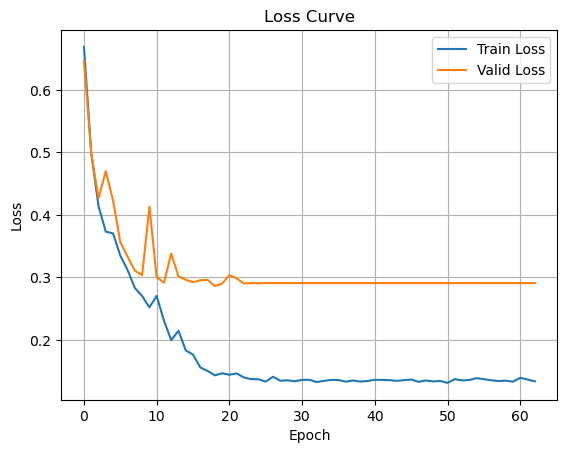

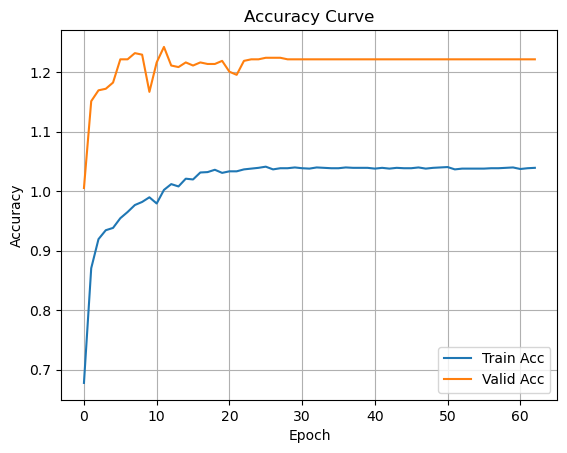

In [79]:
plt.plot(HIST['Train'][0], label='Train Loss')
plt.plot(HIST['Valid'][0], label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.grid()
plt.show()

plt.plot(HIST['Train'][1], label='Train Acc')
plt.plot(HIST['Valid'][1], label='Valid Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.grid()
plt.show()

In [80]:
# import joblib

# # üîπ 1Ô∏è‚É£ SVM Î™®Îç∏ Ï†ÄÏû•
# joblib.dump(model, "../MINIPROJECT10/cgi-bin/nofireCNN_model.pkl")
# print("‚úÖ Î™®Îç∏Ïù¥ 'nofireCNN_model.pkl'Î°ú Ï†ÄÏû•Îê®!")

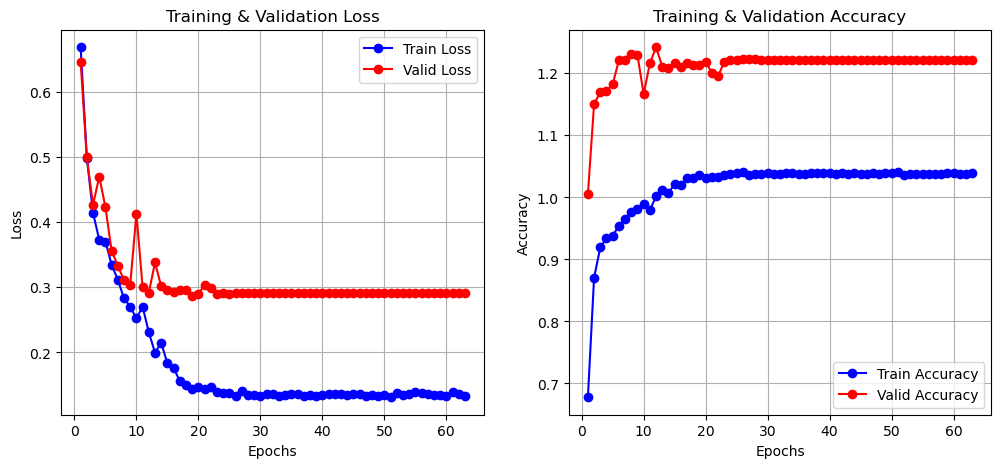

In [81]:
import matplotlib.pyplot as plt

def plot_training_curve(HIST):
    epochs = range(1, len(HIST['Train'][0]) + 1)

    # Loss Í∑∏ÎûòÌîÑ
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, HIST['Train'][0], 'b-o', label="Train Loss")
    plt.plot(epochs, HIST['Valid'][0], 'r-o', label="Valid Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()
    plt.grid(True)

    # Accuracy Í∑∏ÎûòÌîÑ
    plt.subplot(1, 2, 2)
    plt.plot(epochs, HIST['Train'][1], 'b-o', label="Train Accuracy")
    plt.plot(epochs, HIST['Valid'][1], 'r-o', label="Valid Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()
    plt.grid(True)

    plt.show()

# ÌïôÏäµ Í≥°ÏÑ† Ï∂úÎ†•
plot_training_curve(HIST)

In [82]:
# ## Î∞©Î≤ï-1) Ï†ÄÏû•Îêú Î™®Îç∏ Î°úÎî©

WEIGHTS_FILE = MODEL_DIR+'fashion_weights_epoch11_1.242.pt'

model=NoFireForestCNN()
states=torch.load(WEIGHTS_FILE, weights_only=True)
model.load_state_dict(states)

<All keys matched successfully>

In [83]:
count = 0
for feature, target in testDS:
    feature = feature.unsqueeze(0)  # Î∞∞Ïπò Ï∞®Ïõê Ï∂îÍ∞Ä (1, C, H, W)
    output = model(feature)  # (1, 1)
    predicted = (output.sigmoid() > 0.5).long().squeeze()  # 0 ÎòêÎäî 1 Î≥ÄÌôò
    # print(predicted.item(), target)  # Ï†ïÏàò Í∞í Ï∂úÎ†•
    if predicted.item() == target:
        count+=1
print(count/len(testDS))

0.895


In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score

# 1Ô∏è‚É£ Î™®Îç∏ Ï†ïÏùò (Í∞ÄÏ§ëÏπòÏôÄ ÎèôÏùºÌïú Íµ¨Ï°∞Ïó¨Ïïº Ìï®)
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 1)  # Ïù¥ÏßÑ Î∂ÑÎ•ò (Ï∂úÎ†• 1Í∞ú)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ïù¥ÏßÑ Î∂ÑÎ•òÏù¥ÎØÄÎ°ú sigmoid ÏÇ¨Ïö©
        return x

# 2Ô∏è‚É£ Ï†ÄÏû•Îêú Í∞ÄÏ§ëÏπò Î∂àÎü¨Ïò§Í∏∞
MODEL_PATH = "fashion_weights_epoch11_1.242.pt."  # Î™®Îç∏ Í∞ÄÏ§ëÏπò ÌååÏùº Í≤ΩÎ°ú
model = MyModel()
state_dict = torch.load(MODEL_PATH, map_location=torch.device("cpu"))
model.load_state_dict(state_dict)  # Í∞ÄÏ§ëÏπò Î°úÎìú
model.eval()  # ÌèâÍ∞Ä Î™®Îìú

# 3Ô∏è‚É£ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞ (ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÅÏ†ë Ï†ïÏùò ÌïÑÏöî)
testDS = ...  # ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†ïÏùòÌïú Îç∞Ïù¥ÌÑ∞ÏÖã
test_loader = DataLoader(testDS, batch_size=32, shuffle=False)

# 4Ô∏è‚É£ ÌèâÍ∞Ä Ìï®Ïàò
def evaluate_model(model, dataloader):
    total_loss = 0
    correct = 0
    total_samples = 0
    all_preds = []
    all_targets = []

    criterion = nn.BCELoss()  # Binary Cross Entropy Loss

    with torch.no_grad():
        for features, targets in dataloader:
            features, targets = features.to("cpu"), targets.to("cpu").float().unsqueeze(1)

            outputs = model(features)
            loss = criterion(outputs, targets)

            predicted = (outputs > 0.5).long()  # 0 ÎòêÎäî 1Î°ú Î≥ÄÌôò

            total_loss += loss.item()
            correct += (predicted == targets.long()).sum().item()
            total_samples += targets.size(0)

            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    # 5Ô∏è‚É£ ÏÑ±Îä• ÏßÄÌëú Í≥ÑÏÇ∞
    accuracy = correct / total_samples
    precision = precision_score(all_targets, all_preds)
    recall = recall_score(all_targets, all_preds)
    f1 = f1_score(all_targets, all_preds)

    # 6Ô∏è‚É£ Í≤∞Í≥º Ï∂úÎ†• (ÏÇ¨ÏßÑÍ≥º Ïú†ÏÇ¨Ìïú ÌòïÏãù)
    print(f"EPOCH[12/100]------------------")
    print(f"- TRAIN_LOSS {total_loss:.5f}  ACC {accuracy:.5f}")
    print(f"- VALID_LOSS {total_loss:.5f}  ACC {accuracy:.5f}")
    print(f"- PRECISION {precision:.5f}  RECALL {recall:.5f}  F1-SCORE {f1:.5f}")

# 7Ô∏è‚É£ Î™®Îç∏ ÌèâÍ∞Ä Ïã§Ìñâ
evaluate_model(model, test_loader)

C:\Users\KDP-31-\AppData\Local\Temp\ipykernel_28984\706166916.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(MODEL_PATH, map_location=torch.dev

FileNotFoundError: [Errno 2] No such file or directory: 'fashion_weights_epoch11_1.242.pt.'